## Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date, datetime, timedelta

from time import time

## Setup objects about ETF portfolio

### Basic Objects

In [2]:
# Symbollist of the sector ETFs
sectorlist = ['XLB', # Building Materials Sector ETF
              'XLE', # Energy Sector ETF
              'XLF', # Financial Sector ETF
              'XLI', # Industrial Sector ETF
              'XLK', # Technology Sector ETF
              'XLP', # Consumer Staples Sector ETF
              'XLU', # Utilities Sector ETF
              'XLV', # Health Care ETF
              'XLY', # Consumer Discretionary ETF
              'AGG', # Aggregate investment-grade bond ETF
              'TLT', # 20-Year Treasury Bond ETF
              'GLD'  # Gold ETF
             ]

# S&P 500 ETF as benchmark
benchmark = 'SPY'         

# startdate and enddate of research
startdate = '2007-01-02'
enddate = '2019-06-30'

# Risk-free interest rate set as mean treasury yield at 2%
rf = 0.02



## Get Adjusted data from Yahoo Finance

In [3]:
# pip install yahoo_historical before importing
from yahoo_historical import Fetcher

# inspecting raw data
data_spy = Fetcher('SPY', [2011, 1, 1], [2019, 6, 30])
df_spy = data_spy.getHistorical()
df_spy.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2011-01-03,126.709999,127.599998,125.699997,127.050003,107.077354,138725200
1,2011-01-04,127.330002,127.370003,126.190002,126.980003,107.018349,137409700
2,2011-01-05,126.580002,127.720001,126.459999,127.639999,107.574608,133975300
3,2011-01-06,127.690002,127.830002,127.010002,127.389999,107.363914,122519000
4,2011-01-07,127.559998,127.769997,126.150002,127.139999,107.153206,156034600
5,2011-01-10,126.580002,127.160004,126.199997,126.980003,107.018349,122401700
6,2011-01-11,127.440002,127.739998,126.949997,127.430000,107.397629,110287000
7,2011-01-12,128.210007,128.720001,127.459999,128.580002,108.366859,107929200
8,2011-01-13,128.630005,128.690002,128.050003,128.369995,108.189850,129048400
9,2011-01-14,128.190002,129.330002,128.100006,129.300003,108.973648,117677900


In [4]:
# Get dataframe of dividend-dajusted price

def get_adjusted_data(symbol, startdate, enddate=date.today().strftime('%Y-%m-%d')):
    """
    Get stock data from Yahoo Finance for US market and adjust by ex-dividend factors. 
    """
    dt_startdate = datetime.strptime(startdate, '%Y-%m-%d')
    dt_enddate = datetime.strptime(enddate, '%Y-%m-%d')
    start_date = [dt_startdate.year, dt_startdate.month, dt_startdate.day]
    end_date = [dt_enddate.year, dt_enddate.month, dt_enddate.day]
    data = Fetcher(symbol, start_date, end_date)
    df = data.getHistorical()
    df = df[df['Volume'] > 0]
    df.set_index('Date', inplace=True)
    
    # Adjust by cumulative ex-dividend factor
    factor = df['Adj Close'] / df['Close']
    df['Open'] = df['Open'] * factor
    df['High'] = df['High'] * factor
    df['Low'] = df['Low'] * factor
    df['Volume'] = df['Volume'] / factor
    df['Close'] = df['Adj Close']
    df.drop(['Adj Close'], axis=1, inplace=True)
    
    return df

df_spy = get_adjusted_data('SPY', startdate, enddate)
df_spy.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,110.184959,110.657458,108.883659,109.503319,1.223977e+08
2007-01-04,109.394867,110.030034,108.914627,109.735687,8.988097e+07
2007-01-05,109.472359,109.526573,108.736503,108.860428,9.894991e+07
2007-01-08,109.077337,109.534341,108.635817,109.363930,9.250737e+07
2007-01-09,109.456814,109.681450,108.751937,109.270920,9.770387e+07
2007-01-10,108.891436,109.658281,108.674553,109.635033,9.350532e+07
2007-01-11,109.666026,110.471591,109.604057,110.115288,7.033013e+07
2007-01-12,110.107535,110.951843,110.076557,110.951843,7.148403e+07
2007-01-16,110.820175,111.106768,110.556806,110.734970,5.792932e+07



### Data Dictionary

In [5]:
# Start time count
start_time = time()

etf_dict = dict()

# Set the data columns of each Yahoo Finance Dataframe
columns = ['Open', 'High', 'Low', 'Close', 'Volume']
    
# Collect the index ETF data into the data dict
df_benchmark = get_adjusted_data(benchmark, startdate, enddate)
df_benchmark = df_benchmark.loc[startdate:enddate]
df_benchmark.columns = columns
etf_dict[benchmark] = df_benchmark

# Collect each sector ETF data into the data dict
for symbol in sectorlist:
    df = get_adjusted_data(symbol, startdate, enddate)
    df.fillna(method='ffill', inplace=True)           
    df = df.loc[startdate:enddate]
    df.columns = columns
    etf_dict[symbol] = df
    
# Check time elapsed
print('\nTime elapsed: ', time() - start_time)


Time elapsed:  11.629748344421387


In [6]:
etf_dict['TLT'].head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2007-01-03,59.507761,59.667835,59.134256,59.401043,2.804291e+06
2007-01-04,59.507777,59.794579,59.507777,59.761227,2.544312e+06
2007-01-05,59.227656,59.627842,59.194305,59.501114,1.946691e+06
2007-01-08,59.441096,59.607841,59.394408,59.607841,6.210098e+05
2007-01-09,59.681209,59.681209,59.507793,59.607841,7.219127e+05
2007-01-10,59.407742,59.447759,59.281014,59.341045,7.790360e+05
2007-01-11,59.220980,59.227651,58.867483,58.994205,1.939344e+06
2007-01-12,58.794128,59.254339,58.627384,58.720760,1.268857e+06
2007-01-16,58.847496,58.854162,58.714098,58.847496,1.053707e+06


### Normed price: Setting asset price at startdate to be 1.000 and normalize

In [7]:
# Normed benchmark index
df_normed_benchmark = etf_dict[benchmark].loc[:, ['Close']] / etf_dict[benchmark].loc[:, 'Close'][0]
df_normed_benchmark.columns = [benchmark]

# Dataframe of normed price of each ETF
df_normed_sectors = pd.DataFrame(columns=sectorlist)
for symbol in sectorlist:
    df_normed_sectors[symbol] = etf_dict[symbol].loc[:, 'Close'] / etf_dict[symbol].loc[:, 'Close'][0]

# Last 10 rows of sector ETF normed price
df_normed_sectors.tail(10)
    

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,AGG,TLT,GLD
Date,,,,,,,,,,,,
2019-06-17,2.174375,1.410646,1.517659,2.753894,3.943440,3.105145,2.578211,3.385429,3.689143,1.630122,2.212625,2.030829
2019-06-18,2.191439,1.430136,1.537902,2.807396,4.014894,3.088281,2.567582,3.414238,3.717153,1.634546,2.223714,2.041105
2019-06-19,2.179305,1.428531,1.535091,2.805198,4.029392,3.100930,2.587139,3.444894,3.723999,1.640150,2.226906,2.053468
2019-06-20,2.206987,1.460174,1.541838,2.852104,4.088420,3.128334,2.603721,3.460037,3.749830,1.642952,2.232787,2.105170
2019-06-21,2.199968,1.470726,1.538391,2.836903,4.069090,3.118191,2.613792,3.476654,3.732467,1.638675,2.208256,2.119139
2019-06-24,2.208360,1.457536,1.532174,2.831383,4.076884,3.126157,2.614649,3.458479,3.712480,1.641625,2.224722,2.150610
2019-06-25,2.209504,1.445967,1.527087,2.810036,4.002060,3.124564,2.598792,3.444384,3.676880,1.641920,2.231611,2.154785
2019-06-26,2.205690,1.468180,1.524262,2.817029,4.045188,3.079957,2.542222,3.400986,3.688747,1.638233,2.217329,2.135035
2019-06-27,2.212938,1.457305,1.537826,2.819605,4.055580,3.085799,2.545651,3.424725,3.711856,1.642805,2.232954,2.132948


## Portfolio Weights & Performance KPI

### Portfolio Weights

In [8]:
def pf_weight(weight):
    """Compute the normed price and percentage return of the porfolio with given weight."""
    assert weight.min() >= 0, 'Input weight vector has negative weight!'
    assert len(weight) == len(sectorlist), 'Length of weight vector does NOT match!'
    
    # Dataframe of each sector AND the portfolio's normed price 
    df_normed_pf = df_normed_sectors.copy()
    df_normed_pf['Portfolio'] = df_normed_pf.mul(weight, axis=1).sum(axis=1)
    df_normed_pf['Benchmark'] = df_normed_benchmark

    # Percentage return for each symbol and the weighted portfolio
    df_pct_pf = df_normed_pf.pct_change()

    return df_normed_pf, df_pct_pf

In [9]:
# Equal Weight Portfolio
eqweight = np.repeat(1/len(sectorlist), len(sectorlist))
df_normed_pf, df_pct_pf = pf_weight(eqweight)

df_normed_pf.tail(10)

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,AGG,TLT,GLD,Portfolio,Benchmark
Date,,,,,,,,,,,,,,
2019-06-17,2.174375,1.410646,1.517659,2.753894,3.943440,3.105145,2.578211,3.385429,3.689143,1.630122,2.212625,2.030829,2.535960,2.629778
2019-06-18,2.191439,1.430136,1.537902,2.807396,4.014894,3.088281,2.567582,3.414238,3.717153,1.634546,2.223714,2.041105,2.555699,2.657314
2019-06-19,2.179305,1.428531,1.535091,2.805198,4.029392,3.100930,2.587139,3.444894,3.723999,1.640150,2.226906,2.053468,2.562917,2.663312
2019-06-20,2.206987,1.460174,1.541838,2.852104,4.088420,3.128334,2.603721,3.460037,3.749830,1.642952,2.232787,2.105170,2.589363,2.688758
2019-06-21,2.199968,1.470726,1.538391,2.836903,4.069090,3.118191,2.613792,3.476654,3.732467,1.638675,2.208256,2.119139,2.585188,2.684850
2019-06-24,2.208360,1.457536,1.532174,2.831383,4.076884,3.126157,2.614649,3.458479,3.712480,1.641625,2.224722,2.150610,2.586255,2.681563
2019-06-25,2.209504,1.445967,1.527087,2.810036,4.002060,3.124564,2.598792,3.444384,3.676880,1.641920,2.231611,2.154785,2.572299,2.655262
2019-06-26,2.205690,1.468180,1.524262,2.817029,4.045188,3.079957,2.542222,3.400986,3.688747,1.638233,2.217329,2.135035,2.563572,2.652614
2019-06-27,2.212938,1.457305,1.537826,2.819605,4.055580,3.085799,2.545651,3.424725,3.711856,1.642805,2.232954,2.132948,2.571666,2.662020


### Correlation between ETFs & Heatmap

- Notice that TLT, AGG, GLD has negative beta and hence negative correlation with SPY 
- Utilities Sector has least beta among all sector ETFs

In [10]:
# Covariance & Correlation within the portfolio

def pf_cov(weight):
    """Compute the asset corrleation & covariance and also with the portfolio and benchmark."""
    df_normed_df, df_pct_pf = pf_weight(weight)
    cov_symbols = df_pct_pf.cov()     # Covariance matrix useful for beta calculation
    corr_symbols = df_pct_pf.corr()   # Correlation between -1 and 1 
    return cov_symbols, corr_symbols

cov_pf, corr_pf = pf_cov(eqweight)
corr_pf


,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,AGG,TLT,GLD,Portfolio,Benchmark
XLB,1.000000,0.819169,0.686954,0.860920,0.777738,0.640775,0.563000,0.684033,0.775753,-0.112368,-0.404541,0.178650,0.892421,0.870100
XLE,0.819169,1.000000,0.617267,0.757867,0.709328,0.581154,0.588329,0.615318,0.678823,-0.104583,-0.399787,0.174565,0.837210,0.825630
XLF,0.686954,0.617267,1.000000,0.759472,0.705389,0.600424,0.477487,0.602488,0.768400,-0.189622,-0.384105,-0.053898,0.733832,0.822231
XLI,0.860920,0.757867,0.759472,1.000000,0.832946,0.715063,0.577901,0.742105,0.861695,-0.148913,-0.429583,0.034250,0.887681,0.919081
XLK,0.777738,0.709328,0.705389,0.832946,1.000000,0.696031,0.569537,0.724548,0.841777,-0.144861,-0.384806,0.002318,0.864418,0.916822
XLP,0.640775,0.581154,0.600424,0.715063,0.696031,1.000000,0.674642,0.713772,0.723552,-0.101404,-0.306020,-0.016312,0.777097,0.784152
XLU,0.563000,0.588329,0.477487,0.577901,0.569537,0.674642,1.000000,0.573111,0.549509,0.063781,-0.165019,0.083717,0.708573,0.673094
XLV,0.684033,0.615318,0.602488,0.742105,0.724548,0.713772,0.573111,1.000000,0.723534,-0.063252,-0.341725,-0.006816,0.800857,0.822625
XLY,0.775753,0.678823,0.768400,0.861695,0.841777,0.723552,0.549509,0.723534,1.000000,-0.186835,-0.402113,-0.032710,0.846692,0.900597
AGG,-0.112368,-0.104583,-0.189622,-0.148913,-0.144861,-0.101404,0.063781,-0.063252,-0.186835,1.000000,0.608358,0.158209,-0.006580,-0.127139


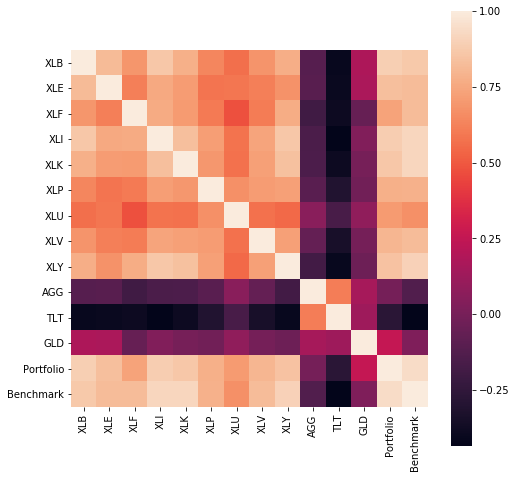

In [11]:
import seaborn as sns

# Using Heatmap to illustrate corrleation matrix 
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_pf, square=True, ax=ax)

## Performance KPI of portfolio for buy-and-hold strategy

In [12]:
def pf_perform_KPI(weight):
    """Get the performance KPI from the time series of percentage or logarithmic daily return."""
    df_normed_pf, df_pct_pf = pf_weight(weight)   # the normed price and percentage return dataframe
    cov_symbols, corr_symbols = pf_cov(weight)    # Covariance matrix for beta computation
    df_log_pf = np.log(df_pct_pf.add(1))          # Logarithmic Return
    
    df_kpi = pd.DataFrame(columns=df_log_pf.columns)
    row_label = pd.Series(['mean_return', 'sigma', 'sharpe_ratio', 'MDD', 'beta'])
    
    for asset in df_kpi.columns:
        mean_return = df_log_pf[asset].mean() * 252 - rf  # Mean annualized return minus risk-free rate
        sd_return = df_log_pf[asset].std() * np.sqrt(252) # Annualized volatility
        df_kpi[asset] = [mean_return, 
                         sd_return, 
                         mean_return / sd_return,   # Sharpe Ratio
                         (df_normed_pf[asset] / df_normed_pf[asset].cummax()).min() - 1, # Maximum Drawdown
                         cov_symbols.loc[asset, 'Benchmark'] / cov_symbols.loc['Benchmark', 'Benchmark']  
                         # beta = asset risk compared to unsystematic market risk
                        ]
    df_kpi.set_index(row_label, inplace=True)

    return df_kpi

In [13]:
df_kpi = pf_perform_KPI(eqweight)
df_kpi

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,AGG,TLT,GLD,Portfolio,Benchmark
mean_return,0.044362,0.011118,0.015647,0.063956,0.092247,0.070290,0.055227,0.078970,0.085385,0.019765,0.044355,0.040952,0.056045,0.058913
sigma,0.244634,0.285031,0.338922,0.213636,0.207411,0.136706,0.177712,0.169125,0.215216,0.048687,0.142103,0.182009,0.123205,0.195170
sharpe_ratio,0.181339,0.039007,0.046168,0.299367,0.444753,0.514174,0.310769,0.466932,0.396742,0.405959,0.312132,0.225002,0.454888,0.301853
MDD,-0.598248,-0.573594,-0.826865,-0.622626,-0.530359,-0.323876,-0.464809,-0.391703,-0.590476,-0.128353,-0.265854,-0.455550,-0.353865,-0.551894
beta,1.088828,1.201885,1.440582,1.004637,0.974783,0.548534,0.613870,0.712136,0.991142,-0.031566,-0.316271,0.023478,0.594431,1.000000


From above KPI dataframe we could observe:

-  Since inspection is across the 2008 financial crisis period, MDD for all equity assets hits above 30%
-  AGG has incredibly low MDD of 12% and zero-beta
-  Technology ETFs, Consumer Discretionary, Health care has highest annualized return
-  Equal-weighted portfolio has lower volatility than ANY individual ETF
-  Equal-weighted portfolio has lower maximum drawdown than ALL but TLT, AGG, XLV
-  All equity sector ETF has positive beta, with utilities having lowest beta and financial sector highest
-  Equal-weighted portfolio has beta 0.59 < 1 thanks to allocation into bonds, gold and low-beta sector



## Portfolio Optimization

### Generate Random weight (from uniform distribution)

-  Presumably we don't know much about fundamentals of each sector
-  Use uniform distribution to generate weights 
-  Eliminate extreme concentration into individual sector

In [14]:
def get_random_weight(rand_size):
    """Generate random weights from uniform distribution and store them into a dataframe."""
    df_weight = pd.DataFrame(columns=sectorlist)
    for symbol in sectorlist:
        df_weight[symbol] = np.random.uniform(size=rand_size)
    df_weight = df_weight.div(df_weight.sum(axis=1), axis=0)

    return df_weight

In [17]:
def randweight_kpi(df_weight, normed_pf, normed_benchmark):
    """Compute KPI's such as mean return, sigma for each randomized portfilio."""
    # Create empty dataframe with the desired KPI as column names
    kpi_columns = ['mean%', 'sigma%', 'sharpe', 'beta']
    df_kpi = pd.DataFrame(columns=kpi_columns)
    benchmark_return = np.log(normed_benchmark.pct_change() + 1)

    # For loop to compute the KPI
    rand_size = df_weight.shape[0]
    for num in range(rand_size):
        weight = df_weight.iloc[num, :]
        df_portfolio = normed_pf.mul(weight, axis=1).sum(axis=1)
        log_return = np.log(df_portfolio.pct_change() + 1)

        log_mean = 100 * (log_return.mean() * 252 - rf)     # Annualized log return
        log_sd = 100 * log_return.std() * np.sqrt(252)           # Average daily SD
        sharpe = log_mean / log_sd                               # Sharpe Ratio

        # Calcuation of beta (ratio of covariance over benchmark's variance)
        cov_random = pd.concat([pd.DataFrame(log_return, columns=['portfolio']), benchmark_return], axis=1).cov()
        beta = cov_random.iloc[0, 1] / cov_random.iloc[1, 1]    # beta
        
        # Maximum Drawdown 
        mdd = (df_portfolio / df_portfolio.cummax()).min() - 1
        
        df_kpi = df_kpi.append({'mean%': log_mean, 'sigma%': log_sd, 'sharpe': sharpe, 'beta': beta, 'mdd': mdd}, 
                               ignore_index=True)

    df_kpi = pd.concat([df_weight, df_kpi], axis=1)    

    return df_kpi

## Simulate 2500 portfolios

In [19]:
# Start time count for simulations
from time import time
start_time = time()

rf = 0.02           # Risk-free rate
rand_size = 2500    # 2500 Simulations

df_weight = get_random_weight(rand_size)
df_kpi = randweight_kpi(df_weight, df_normed_sectors, df_normed_benchmark)

print('Mean Sharpe: ', df_kpi['sharpe'].mean())
print('Max Sharpe: ',  df_kpi['sharpe'].max())
print('Mean CAGR: ', df_kpi['mean%'].mean())
print('Max CAGR: ', df_kpi['mean%'].max())
print('Mean Sigma: ' , df_kpi['sigma%'].mean())
print('Min Sigma: ' , df_kpi['sigma%'].min())
print('Average beta: ', df_kpi['beta'].mean())
print('Average MDD: ', df_kpi['mdd'].mean())

# Check time elapsed
print('\nTime elapsed: ', time() - start_time)

Mean Sharpe:  0.45201443625064547
Max Sharpe:  0.6788542440180149
Mean CAGR:  5.601112372692387
Max CAGR:  7.144852698383463
Mean Sigma:  12.561001810730136
Min Sigma:  8.550199453773415
Average beta:  0.5974767862051784
Average MDD:  -0.35983358922360725

Time elapsed:  24.282633543014526


## Sorting with Sharpe ratios, mean return & volatility

In [20]:
# Portfolio with max sharpe
maxsharpe_row = df_kpi['sharpe'].idxmax()
maxsharpe_df = df_weight.iloc[[maxsharpe_row], :]

# Portfolio with max return
maxreturn_row = df_kpi['mean%'].idxmax()
maxreturn_df = df_weight.iloc[[maxreturn_row], :]

# Portfolio with min volatility
minvol_row = df_kpi['sigma%'].idxmin()
minvol_df = df_weight.iloc[[minvol_row], :]

# Joining the three objectives
df_optpf = pd.concat([maxsharpe_df, maxreturn_df, minvol_df], axis=0)
df_optpf.index = ['max_sharpe', 'max_return', 'min_vol']
df_optpf

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY,AGG,TLT,GLD
max_sharpe,0.009348,0.020317,0.015300,0.006268,0.145079,0.189642,0.085367,0.009102,0.176189,0.050818,0.178084,0.114486
max_return,0.027447,0.001392,0.008696,0.038561,0.275521,0.035297,0.182794,0.045285,0.168439,0.016955,0.120652,0.078961
min_vol,0.049540,0.089322,0.094822,0.049453,0.015253,0.029195,0.126680,0.018561,0.075904,0.215089,0.228485,0.007697


### Average weights of top 25 Sharpe-ratio portfolios (with pie chart)

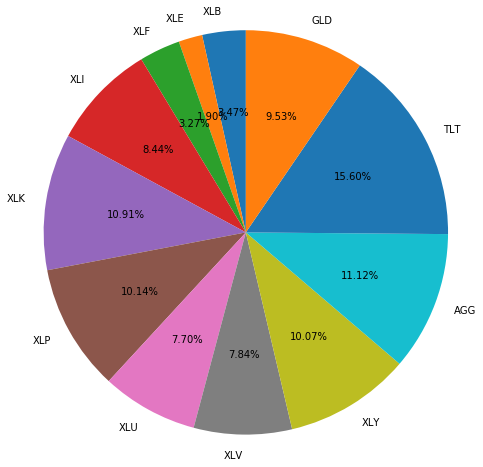

In [21]:
# Sort the portfolios by Sharpe ratio (descending order)
df_sort_sharpe = df_kpi.sort_values(['sharpe', 'mean%'], ascending=False)
df_sort_sharpe.reset_index(inplace=True)
df_sort_sharpe.drop('index', axis=1, inplace=True)

# Average weights & Sharpe ratio of the top 1% portfolios
top_sharpe = pd.DataFrame(df_sort_sharpe.head(rand_size//100).mean()).transpose()

# Piechart labels by the ETF symbol list
labels = sectorlist
pct = top_sharpe.loc[0, sectorlist]

# Constructing Pie Chart
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(pct, labels=labels, autopct='%1.2f%%', shadow=False, startangle=90)
ax.axis('equal')
plt.show()

In [22]:
# Average KPI for the top 25 Sharpe-ratio Portfolios

top_sharpe.loc[:, ['mean%', 'sigma%', 'sharpe', 'beta', 'mdd']]

,mean%,sigma%,sharpe,beta,mdd
0,6.039428,9.742795,0.619992,0.429248,-0.268238


- Top 25 Sharpe Porfolio on average puts heaviest weights on the following 3 sectors:
    - Treasury Bonds (TLT)
    - Consumer Staple (XLP)
    - Bond (AGG)
    - Gold (GLD)
    
- Non-equity exposure is over 35%

### Average weights of top 25 Return portfolios

-  Expect heavier weights of best-growth sectors such as health care and technologies

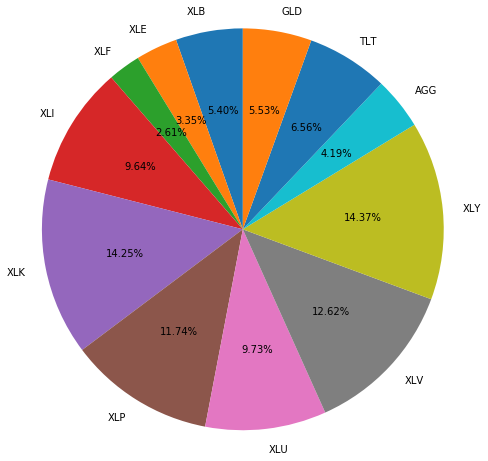

In [23]:
# Average weights & Sharpe ratio of the top 25 return portfolios
df_sort_return = df_kpi.sort_values(['mean%', 'sharpe'], ascending=False)
df_sort_return.reset_index(inplace=True)
df_sort_return.drop('index', axis=1, inplace=True)

top_return = pd.DataFrame(df_sort_return.head(rand_size//100).mean()).transpose()
pct = top_return.loc[0, sectorlist]

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(pct, labels=labels, autopct='%1.2f%%', shadow=False, startangle=90)
ax.axis('equal')

plt.show()

In [24]:
# Average KPI for the top 25 return Portfolios

top_return.loc[:, ['mean%', 'sigma%', 'sharpe', 'beta', 'mdd']]

,mean%,sigma%,sharpe,beta,mdd
0,6.742532,13.356291,0.508972,0.651959,-0.382694


- Top 25 Return Porfolio on average puts heaviest weights on following sectors:
    - Technology (XLK)
    - Consumer Discretionary (XLY)
    - Health Care (XLV)
    - Consumer Staple (XLP)

- Non-equity allocation is reduced to less than 18%

### Average weights of top 25 low-volatility portfolios

-  Expect heavier weights of risk-off assets like TLT, GLD

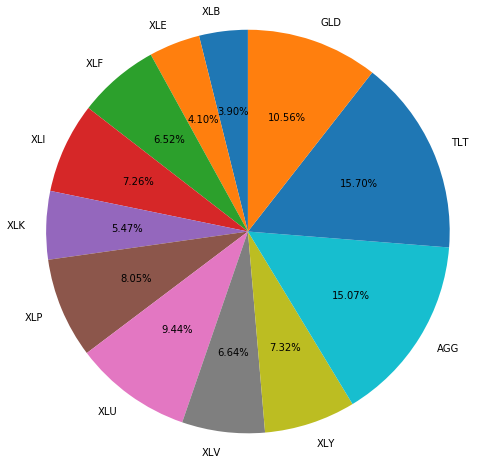

In [25]:
# Average weights & Sharpe ratio of the bottom 1% volatility portfolios

df_sort_sigma = df_kpi.sort_values(['sigma%'], ascending=True)
df_sort_sigma.reset_index(inplace=True)
df_sort_sigma.drop('index', axis=1, inplace=True)

min_vol = pd.DataFrame(df_sort_sigma.head(rand_size//100).mean()).transpose()
pct = min_vol.loc[0, sectorlist]

fig, ax = plt.subplots(figsize=(8,8))
ax.pie(pct, labels=labels, autopct='%1.2f%%', shadow=False, startangle=90)
ax.axis('equal')

plt.show()

In [26]:
# Average KPI for the top 25 low-vol Portfolios

min_vol.loc[:, ['mean%', 'sigma%', 'sharpe', 'beta', 'mdd']]

,mean%,sigma%,sharpe,beta,mdd
0,5.306747,9.207588,0.576206,0.387731,-0.256361


- Top 25 low-vol Porfolio on average puts heaviest weights on following sectors:
    - Treasuries
    - Bond
    - Gold
    - Utilities

- Non-equity exposure is even higher at above 40%

### Scatter Plot & Optimal Portfolios

D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


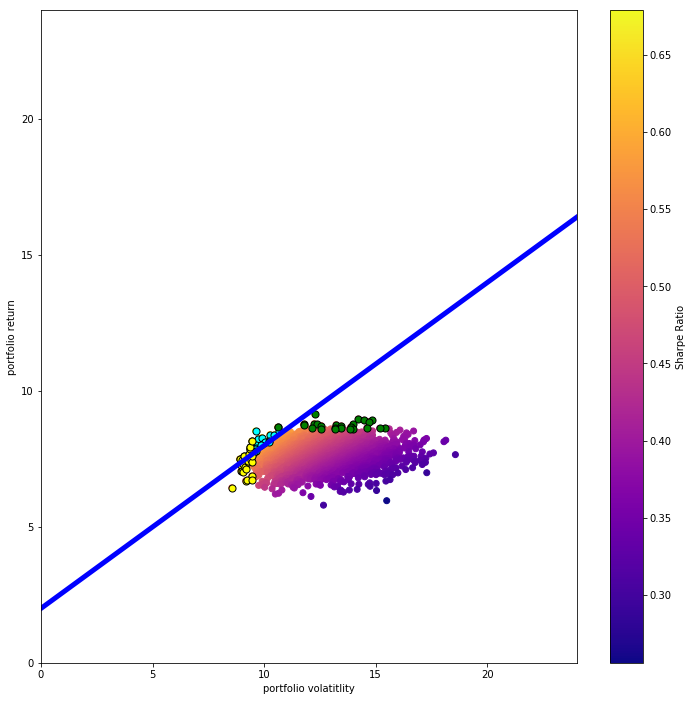

In [27]:
# Scatter plot of all (sigma, return)-tuple of the 10000 portfolios 
plt.figure(figsize=(12,12))
fig = plt.scatter(df_sort_sharpe['sigma%'], df_sort_sharpe['mean%'] + 100 * rf, c=df_sort_sharpe['sharpe'], cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('portfolio volatitlity')
plt.ylabel('portfolio return')

# Add cyan dots for top 25 Sharpe ratio
top1 = plt.scatter(df_sort_sharpe.head(rand_size//100)['sigma%'], df_sort_sharpe.head(rand_size//100)['mean%'] + 100 * rf, c='cyan', s=50, edgecolors='black')

# Add green dots for top 25 Return
top2 = plt.scatter(df_sort_return.head(rand_size//100)['sigma%'], df_sort_return.head(rand_size//100)['mean%'] + 100 * rf, c='green', s=50, edgecolors='black')

# Add yellow dots for top 25 low-vol
top3 = plt.scatter(df_sort_sigma.head(rand_size//100)['sigma%'], df_sort_sigma.head(rand_size//100)['mean%'] + 100 * rf, c='yellow', s=50, edgecolors='black')

# Add straight line of optimal portfolios
xline = np.linspace(0, 24.0, 500)
yline = df_sort_sharpe['sharpe'][rand_size//100] * xline + 100 * rf
plt.plot(xline, yline, 'b-', linewidth=5)

# Set annualized return range from 0 to 24%
plt.ylim(ymin=0)
plt.ylim(ymax=24)

# Set sigma range from 0 to 24%
plt.xlim(xmin=0)
plt.xlim(xmax=24)
plt.show()

- Dots above the straight line represents portfolios with Sharpe ratio better than 99th percentile 
    - Top Low-vol portfolios overall performs more stable than top-return portfolios

---

-  However the above diagram is NOT a reasonable modelling of forward testing
    -  Train-test-split is necessary

## Train-test-split on asset weights

- Split the dataset into two equal halves
- Find the top 1% sharpe-ratio portfolios on training set (2011-2014)
- Verify the respective (sigma, return)-tuple on test set (2015-2018)

In [28]:
startdate = '2007-01-01'
enddate = '2019-06-30'

def train_test_split(train_end):
    """Split the dataset into training set and test set, with normed prices in each of two datasets."""

    # Split the normed_pf and normed_index dataframes into two halves
    train_pf = df_normed_sectors.loc[startdate:train_end]
    train_benchmark = df_normed_benchmark.loc[startdate:train_end]
    test_pf = df_normed_pf.loc[train_end:enddate]
    test_benchmark = df_normed_benchmark.loc[train_end:enddate]

    # Normalize the test datasets
    test_pf = test_pf / test_pf.iloc[0, :]
    test_benchmark = test_benchmark / test_benchmark.iloc[0, :]      

    # KPI dataframes for training datasets & test datasets
    train_kpi = randweight_kpi(df_weight, train_pf, train_benchmark)
    test_kpi = randweight_kpi(df_weight, test_pf, test_benchmark)

    return train_kpi, test_kpi

D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


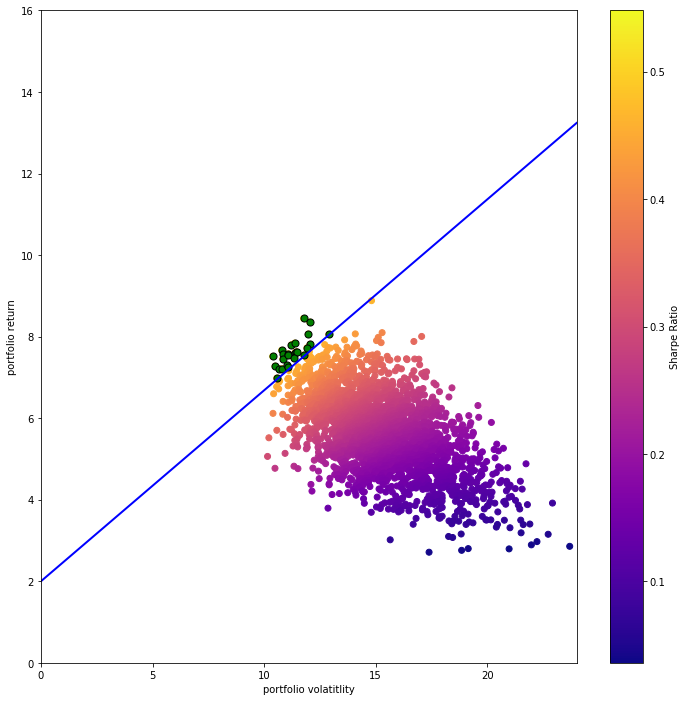

In [29]:
# Split the dataset by the timestamp 2012-12-31
# train_KPI:  2007-2012
# test_KPI:   2013-2019
train_kpi, test_kpi = train_test_split('2012-12-31')

# Sort with descending Sharpe ratio and scatter plots 
train_sort_sharpe = train_kpi.sort_values(['sharpe', 'mean%'], ascending=False)
train_sort_sharpe.reset_index(inplace=True)

plt.figure(figsize=(12,12))
fig = plt.scatter(train_sort_sharpe['sigma%'], train_sort_sharpe['mean%'] + 100 * rf, c=train_sort_sharpe['sharpe'], cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('portfolio volatitlity')
plt.ylabel('portfolio return')

# Add green dots for top 1% Sharpe ratio
top = plt.scatter(train_sort_sharpe.head(rand_size//100)['sigma%'], train_sort_sharpe.head(rand_size//100)['mean%'] + 100 * rf, c='green', s=50, edgecolors='black')

# Add straight line of optimal portfolio
xline = np.linspace(0, 24.0, 500)
yline = train_sort_sharpe['sharpe'][rand_size//100] * xline + 100 * rf
plt.plot(xline, yline, 'b-', linewidth=2)

# Set annualized return range from 0 to 24%
plt.ylim(ymin=0)
plt.ylim(ymax=16)

# Set sigma range from 0 to 24%
plt.xlim(xmin=0)
plt.xlim(xmax=24)
plt.show()


D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
D:\Anaconda\lib\site-packages\matplotlib\axes\_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')


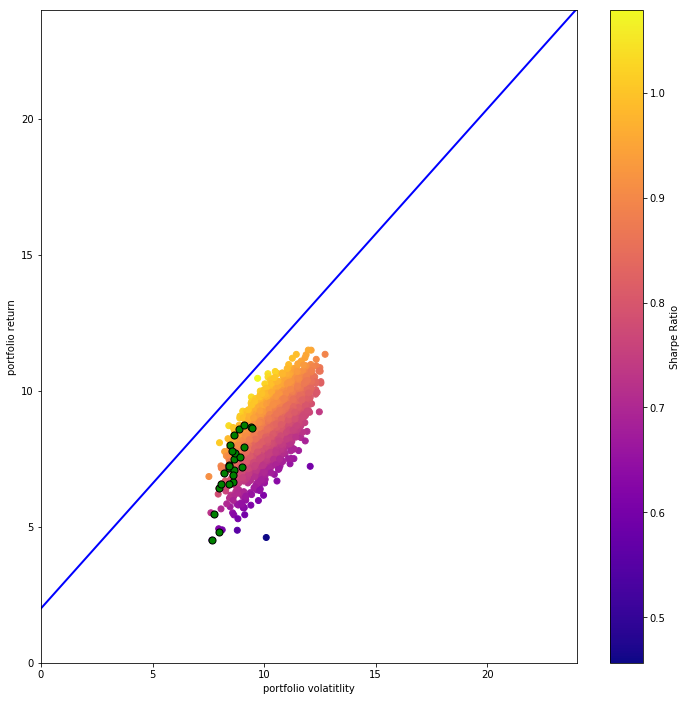

In [30]:
# Apply the top 1% sharpe in training set to test set 

top_index = train_sort_sharpe.loc[0:rand_size//100, 'index']

plt.figure(figsize=(12,12))
fig = plt.scatter(test_kpi['sigma%'], test_kpi['mean%'], c=test_kpi['sharpe'], cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('portfolio volatitlity')
plt.ylabel('portfolio return')

# Add red dots for top 1% Sharpe ratio
top = plt.scatter(test_kpi.loc[top_index, 'sigma%'], test_kpi.loc[top_index, 'mean%'], c='green', s=50, edgecolors='black')

# Add straight line of optimal portfolio
xline = np.linspace(0, 24.0, 500)
yline = test_kpi.loc[0,'sharpe'] * xline + 100 * rf
plt.plot(xline, yline, 'b-', linewidth=2)

# Set annualized return range from 0 to 24%
plt.ylim(ymin=0)
plt.ylim(ymax=24)

# Set sigma range from 0 to 24%
plt.xlim(xmin=0)
plt.xlim(xmax=24)
plt.show()

-  As expected, top candidates in training set performs relatively worse in test set

### KPI for training set and test set

In [31]:
# KPI for training set

top_train = pd.DataFrame(train_sort_sharpe.head(rand_size//100).mean()).transpose()
top_train.loc[:, ['mean%', 'sigma%', 'sharpe', 'beta', 'mdd']]

,mean%,sigma%,sharpe,beta,mdd
0,5.622752,11.290822,0.498171,0.363159,-0.256857


In [32]:
# Mean Performance in test set

top_apply_test = pd.DataFrame(test_kpi.loc[top_index].mean()).transpose()
top_apply_test.loc[:, ['mean%', 'sigma%', 'sharpe', 'beta', 'mdd']]

,mean%,sigma%,sharpe,beta,mdd
0,7.23579,8.569416,0.841029,0.610332,-0.132582


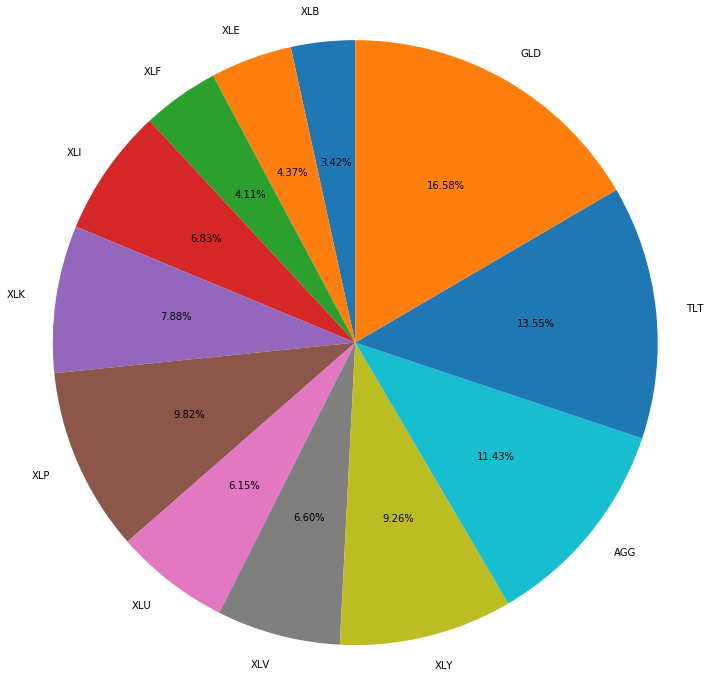

In [33]:
# Mean allocation for top 1% sharpe in training set

top_train = pd.DataFrame(train_sort_sharpe.head(rand_size//100).mean()).transpose()
top_train_allocate = top_train.loc[0, sectorlist]

fig, ax = plt.subplots(figsize=(12,12))
ax.pie(top_train_allocate, labels=sectorlist, autopct='%1.2f%%', shadow=False, startangle=90)
ax.axis('equal')

plt.show()


-  Top 1% Sharpe ratio in training set has average weights heavist in:
    -  Gold (GLD)
    -  Treasury (TLT)
    -  Consumer Staples (XLP)
    -  Health Care (XLV)
    
-  Not much different from observation without train-test-split

-  43% non-equity allocation, higher than 35% as in entire data set ('07-'19)
    - The 2008 crisis spans ONLY in training set 